## Import Dependencies, Read CSV and Create Dataframes.

In [1]:
#Pandas library to create DataFrames
import pandas as pd
#NumPy library for converting data types
import numpy as np
import matplotlib
matplotlib.__version__
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
load_states = "../state_covid_info/Complete_states.csv"
load_2020 = "../data_frame/Complete_annual_dataframes/Complete_2020.csv"

In [3]:
states_df = pd.read_csv(load_states)
states_df.head()

,State,Population,Lockdown Start,Initial Expected Lockdown End,Phase 1 Re-Opening Start,Political Alignment
0,AK,"731,545",3/23/2020,3/30/2020,4/24/2020,Red
1,AL,"4,903,185",4/4/2020,4/30/2020,4/30/2020,Red
2,AR,"3,017,804",3/15/2020,3/27/2020,6/5/2020,Red
3,AZ,"7,278,717",4/30/2020,5/15/2020,5/18/2020,Blue
4,CA,"39,512,223",3/19/2020,4/2/2020,5/13/2020,Blue


In [4]:
#If I set the Index as "State" here, an extra column named "Unammed:0" populates. 
df_2020 = pd.read_csv(load_2020, index_col=[0])
df_2020.head()

,Order Number,Company Name,Ship Date,City,State,Zip,Shipping Service,Created Date,Weight,Item/Bottle Count
0,0,Ecom3,1/2/20,Plantation,FL,33325,UPS,1/1/20,9.9,3.0
1,1,Ecom3,1/2/20,Lafayette,CA,94549,UPS,12/31/19,35.0,10.0
2,2,Ecom3,1/2/20,New York,NY,10022,FEH,1/1/20,29.0,8.0
3,3,Ecom3,1/3/20,New York,NY,10006,FEH,1/2/20,21.5,6.0
4,4,Ecom3,1/2/20,Walkersville,MD,21793,FXG,12/31/19,41.0,12.0


In [5]:
df_2020.State.unique()

array(['FL', 'CA', 'NY', 'MD', 'TX', 'OH', 'NM', 'CT', 'MI', 'WA', 'PA',
       'CO', 'LA', 'HI', 'MA', 'NH', 'NJ', 'TN', 'IN', 'KS', 'NE', 'NC',
       'VA', 'IA', 'MN', 'WI', 'SC', 'SD', 'OR', 'ND', 'WY', 'IL', 'VT',
       'GA', 'AZ', 'DC', 'NV', 'MO', 'ME', 'RI', 'AR', 'AK', 'WV', 'MT',
       'ID', 'OK', 'AL', 'DE', 'Va', 'MS', 'KY'], dtype=object)

In [6]:
df_2020 = df_2020.set_index("State")
df_2020

,Order Number,Company Name,Ship Date,City,Zip,Shipping Service,Created Date,Weight,Item/Bottle Count
State,,,,,,,,,
FL,0,Ecom3,1/2/20,Plantation,33325,UPS,1/1/20,9.9,3.0
CA,1,Ecom3,1/2/20,Lafayette,94549,UPS,12/31/19,35.0,10.0
NY,2,Ecom3,1/2/20,New York,10022,FEH,1/1/20,29.0,8.0
NY,3,Ecom3,1/3/20,New York,10006,FEH,1/2/20,21.5,6.0
MD,4,Ecom3,1/2/20,Walkersville,21793,FXG,12/31/19,41.0,12.0
...,...,...,...,...,...,...,...,...,...
CO,235998,Winery3,12/29/2020,Aurora,80013,UPS,12/29/2020,21.5,6.0
CA,235999,Winery3,12/29/2020,Napa,94558,GSC,12/29/2020,9.9,3.0
CO,236000,Winery3,12/29/2020,Aurora,80014,UPS,12/29/2020,39.0,12.0


In [7]:
#Join states and 2020 df on "State"
states_2020 = df_2020.join(states_df.set_index ("State"), on = "State")
states_2020.head()

,Order Number,Company Name,Ship Date,City,Zip,Shipping Service,Created Date,Weight,Item/Bottle Count,Population,Lockdown Start,Initial Expected Lockdown End,Phase 1 Re-Opening Start,Political Alignment
State,,,,,,,,,,,,,,
FL,0,Ecom3,1/2/20,Plantation,33325,UPS,1/1/20,9.9,3.0,"21,477,737",4/1/2020,5/1/2020,9/25/2020,Red
CA,1,Ecom3,1/2/20,Lafayette,94549,UPS,12/31/19,35.0,10.0,"39,512,223",3/19/2020,4/2/2020,5/13/2020,Blue
NY,2,Ecom3,1/2/20,New York,10022,FEH,1/1/20,29.0,8.0,"19,453,561",3/22/2020,4/6/2020,6/8/2020,blue
NY,3,Ecom3,1/3/20,New York,10006,FEH,1/2/20,21.5,6.0,"19,453,561",3/22/2020,4/6/2020,6/8/2020,blue
MD,4,Ecom3,1/2/20,Walkersville,21793,FXG,12/31/19,41.0,12.0,"6,045,680",3/12/2020,3/27/2020,5/13/2020,Blue


In [8]:
states_2020.count()

Order Number                     236003
Company Name                     236003
Ship Date                        236003
City                             236003
Zip                              236003
Shipping Service                 236003
Created Date                     236003
Weight                           236003
Item/Bottle Count                236003
Population                       234320
Lockdown Start                   234320
Initial Expected Lockdown End    234320
Phase 1 Re-Opening Start         234320
Political Alignment              234320
dtype: int64

In [9]:
states_2020.tail(10)

,Order Number,Company Name,Ship Date,City,Zip,Shipping Service,Created Date,Weight,Item/Bottle Count,Population,Lockdown Start,Initial Expected Lockdown End,Phase 1 Re-Opening Start,Political Alignment
State,,,,,,,,,,,,,,
CA,235993,Winery3,12/21/2020,San Francisco,94109,GSC,12/21/2020,9.9,3.0,"39,512,223",3/19/2020,4/2/2020,5/13/2020,Blue
NC,235994,Winery3,12/23/2020,Charlotte,28211,UP3,12/23/2020,41.0,12.0,"10,488,084",3/30/2020,4/29/2020,5/20/2020,Red
HI,235995,Winery3,12/28/2020,kamuela,96743,UPS,12/28/2020,21.5,6.0,"1,415,872",3/23/2020,4/30/2020,5/5/2020,Blue
TX,235996,Winery3,12/28/2020,Carrollton,75010,UP2,12/28/2020,21.5,6.0,"28,995,881",3/31/2020,5/4/2020,5/1/2020,Red
FL,235997,Winery3,12/28/2020,Delray Beach,33446,UPS,12/28/2020,21.5,6.0,"21,477,737",4/1/2020,5/1/2020,9/25/2020,Red
CO,235998,Winery3,12/29/2020,Aurora,80013,UPS,12/29/2020,21.5,6.0,"5,758,736",3/26/2020,4/26/2020,4/26/2020,Blue
CA,235999,Winery3,12/29/2020,Napa,94558,GSC,12/29/2020,9.9,3.0,"39,512,223",3/19/2020,4/2/2020,5/13/2020,Blue
CO,236000,Winery3,12/29/2020,Aurora,80014,UPS,12/29/2020,39.0,12.0,"5,758,736",3/26/2020,4/26/2020,4/26/2020,Blue
VA,236001,Winery3,12/28/2020,Charlottesville,22901,UPS,12/28/2020,21.5,6.0,"8,535,519",3/30/2020,5/15/2020,5/29/2020,Blue


In [10]:
#This code changes all the values to "None" Needs fixing.
#Change Red and Blue values to be "Red" "Blue". Currently multiple versions- ['Red' 'Blue' 'blue' 'Blue ' 'red' nan]
#states_2020['Political Alignment'] = states_2020['Political Alignment'].replace({'blue': 'Blue',
#                                                                                 'Blue ': 'Blue',
#                                                                                 'red': 'Red'}, inplace=True)
#states_2020

In [11]:
# Calculate the total 2020 Item/Bottle Count.
total_count_2020 = states_2020["Item/Bottle Count"].sum()
total_count_2020

1148819.0

## Slice Each State Into its Own Dataframe and Calculate Total Item/Bottle Count 2020.

In [12]:
#['FL', 'CA', 'NY', 'MD', 'TX', 'OH', 'NM', 'CT', 'MI', 'WA', 'PA',
#       'CO', 'LA', 'HI', 'MA', 'NH', 'NJ', 'TN', 'IN', 'KS', 'NE', 'NC',
#       'VA', 'IA', 'MN', 'WI', 'SC', 'SD', 'OR', 'ND', 'WY', 'IL', 'VT',
#       'GA', 'AZ', 'DC', 'NV', 'MO', 'ME', 'RI', 'AR', 'AK', 'WV', 'MT',
#       'ID', 'OK', 'AL', 'DE', 'Va', 'MS', 'KY']

In [13]:
slice_list = ["AL"]
Alabama = states_2020.iloc[states_2020.index.isin(slice_list)]
#Alabama

In [14]:
# Calculate the total Alabama Item/Bottle Count.
Alabama["Item/Bottle Count"].sum()

2024.0

In [15]:
slice_list = ["AK"]
Alaska = states_2020.iloc[states_2020.index.isin(slice_list)]
#Alaska

In [16]:
# Calculate the total Alaska Item/Bottle Count.
Alaska["Item/Bottle Count"].sum()

2057.0

In [17]:
slice_list = ["AZ"]
Arizona = states_2020.iloc[states_2020.index.isin(slice_list)]
#Arizona

In [18]:
# Calculate the total Arizona Item/Bottle Count.
Arizona["Item/Bottle Count"].sum()

16378.0

In [19]:
slice_list = ["AR"]
Arkansas = states_2020.iloc[states_2020.index.isin(slice_list)]
#Arkansas

In [20]:
# Calculate the total Arkansas Item/Bottle Count.
Arkansas["Item/Bottle Count"].sum()

6512.0

In [21]:
slice_list = ["CA"]
California = states_2020.iloc[states_2020.index.isin(slice_list)]
#California

In [22]:
# Calculate the total California Item/Bottle Count.
California["Item/Bottle Count"].sum()

130312.0

In [23]:
slice_list = ["CO"]
Colorado = states_2020.iloc[states_2020.index.isin(slice_list)]
#Colorado

In [24]:
# Calculate the total Alaska Item/Bottle Count.
Colorado["Item/Bottle Count"].sum()

27802.0

In [25]:
slice_list = ["CT"]
Connecticut = states_2020.iloc[states_2020.index.isin(slice_list)]
#Connecticut

In [26]:
# Calculate the total Connecticut Item/Bottle Count.
Connecticut["Item/Bottle Count"].sum()

24062.0

In [27]:
slice_list = ["DC"]
DC = states_2020.iloc[states_2020.index.isin(slice_list)]
#DC

In [28]:
# Calculate the total Connecticut Item/Bottle Count.
DC["Item/Bottle Count"].sum()

8288.0

In [29]:
slice_list = ["DE"]
Delaware = states_2020.iloc[states_2020.index.isin(slice_list)]
#Delaware

In [30]:
# Calculate the total Delaware Item/Bottle Count.
Delaware["Item/Bottle Count"].sum()

1289.0

In [31]:
slice_list = ["FL"]
Florida = states_2020.iloc[states_2020.index.isin(slice_list)]
#Florida

In [32]:
# Calculate the total Florida Item/Bottle Count.
Florida["Item/Bottle Count"].sum()

82961.0

In [33]:
slice_list = ["GA"]
Georgia = states_2020.iloc[states_2020.index.isin(slice_list)]
#Georgia

In [34]:
# Calculate the total Georgia Item/Bottle Count.
Georgia["Item/Bottle Count"].sum()

34693.0

In [35]:
slice_list = ["HI"]
Hawaii = states_2020.iloc[states_2020.index.isin(slice_list)]
#Hawaii

In [36]:
# Calculate the total Hawaii Item/Bottle Count.
Hawaii["Item/Bottle Count"].sum()

9666.0

In [37]:
slice_list = ["ID"]
Idaho = states_2020.iloc[states_2020.index.isin(slice_list)]
#Idaho

In [38]:
# Calculate the total Idaho Item/Bottle Count.
Idaho["Item/Bottle Count"].sum()

3391.0

In [39]:
slice_list = ["IL"]
Illinois = states_2020.iloc[states_2020.index.isin(slice_list)]
#Illinois

In [40]:
# Calculate the total Illinois Item/Bottle Count.
Illinois["Item/Bottle Count"].sum()

51356.0

In [41]:
slice_list = ["IN"]
Indiana = states_2020.iloc[states_2020.index.isin(slice_list)]
#Indiana

In [42]:
# Calculate the total Indiana Item/Bottle Count.
Indiana["Item/Bottle Count"].sum()

17476.0

In [43]:
slice_list = ["IA"]
Iowa = states_2020.iloc[states_2020.index.isin(slice_list)]
#Iowa

In [44]:
# Calculate the total Iowa Item/Bottle Count.
Iowa["Item/Bottle Count"].sum()

5846.0

In [45]:
slice_list = ["KS"]
Kansas = states_2020.iloc[states_2020.index.isin(slice_list)]
#Kansas

In [46]:
# Calculate the total Kansas Item/Bottle Count.
Kansas["Item/Bottle Count"].sum()

7165.0

In [47]:
#Effective March 12, 2021, brand registration is not required for DTC products.  DTC shipping previously prohibited. 
slice_list = ["KY"]
Kentucky = states_2020.iloc[states_2020.index.isin(slice_list)]
#Kentucky

In [48]:
# Calculate the total Kentucky Item/Bottle Count.
Kentucky["Item/Bottle Count"].sum()

40.0

In [49]:
slice_list = ["LA"]
Louisiana = states_2020.iloc[states_2020.index.isin(slice_list)]
#Louisiana

In [50]:
# Calculate the total Louisiana Item/Bottle Count.
Louisiana["Item/Bottle Count"].sum()

10558.0

In [51]:
slice_list = ["ME"]
Maine = states_2020.iloc[states_2020.index.isin(slice_list)]
#Maine

In [52]:
# Calculate the total Maine Item/Bottle Count.
Maine["Item/Bottle Count"].sum()

5007.0

In [53]:
slice_list = ["MD"]
Maryland = states_2020.iloc[states_2020.index.isin(slice_list)]
#Maryland

In [54]:
# Calculate the total Maryland Item/Bottle Count.
Maryland["Item/Bottle Count"].sum()

29515.0

In [55]:
slice_list = ["MA"]
Massachusetts = states_2020.iloc[states_2020.index.isin(slice_list)]
#Massachusetts

In [56]:
# Calculate the total Massachusetts Item/Bottle Count.
Massachusetts["Item/Bottle Count"].sum()

43665.0

In [57]:
slice_list = ["MI"]
Michigan = states_2020.iloc[states_2020.index.isin(slice_list)]
#Michigan

In [58]:
# Calculate the total Michigan Item/Bottle Count.
Michigan["Item/Bottle Count"].sum()

36218.0

In [59]:
slice_list = ["MN"]
Minnesota = states_2020.iloc[states_2020.index.isin(slice_list)]
#Minnesota

In [60]:
# Calculate the total Minnesota Item/Bottle Count.
Minnesota["Item/Bottle Count"].sum()

15040.0

In [61]:
#DTC shipping prohibited in Mississippi. This order was sent to Philedelphia, MS (A real place!) and likely
#bypassed the checks/balances that are in place to adhere to shipping laws. 
slice_list = ["MS"]
Mississippi = states_2020.iloc[states_2020.index.isin(slice_list)]
#Mississippi

In [62]:
# Calculate the total Mississippi Item/Bottle Count.
Mississippi["Item/Bottle Count"].sum()

6.0

In [63]:
slice_list = ["MO"]
Missouri = states_2020.iloc[states_2020.index.isin(slice_list)]
#Missouri

In [64]:
# Calculate the total Missouri Item/Bottle Count.
Missouri["Item/Bottle Count"].sum()

13633.0

In [65]:
slice_list = ["MT"]
Montana = states_2020.iloc[states_2020.index.isin(slice_list)]
#Montana

In [66]:
# Calculate the total Montana Item/Bottle Count.
Montana["Item/Bottle Count"].sum()

2472.0

In [67]:
#No shipping law information- No orders for Nebraska
slice_list = ["NE"]
Nebraska = states_2020.iloc[states_2020.index.isin(slice_list)]
#Nebraska

In [68]:
# Calculate the total Nebraska Item/Bottle Count.
Nebraska["Item/Bottle Count"].sum()

4753.0

In [69]:
slice_list = ["NV"]
Nevada = states_2020.iloc[states_2020.index.isin(slice_list)]
#Nevada

In [70]:
# Calculate the total Nevada Item/Bottle Count.
Nevada["Item/Bottle Count"].sum()

6802.0

In [71]:
slice_list = ["NH"]
New_Hampshire = states_2020.iloc[states_2020.index.isin(slice_list)]
#New_Hampshire

In [72]:
# Calculate the total New_Hampshire Item/Bottle Count.
New_Hampshire["Item/Bottle Count"].sum()

6015.0

In [73]:
slice_list = ["NJ"]
New_Jersey = states_2020.iloc[states_2020.index.isin(slice_list)]
#New_Jersey

In [74]:
# Calculate the total New Jersey Item/Bottle Count.
New_Jersey["Item/Bottle Count"].sum()

61171.0

In [75]:
slice_list = ["NM"]
New_Mexico = states_2020.iloc[states_2020.index.isin(slice_list)]
#New_Mexico

In [76]:
# Calculate the total New Mexico Item/Bottle Count.
New_Mexico["Item/Bottle Count"].sum()

4487.0

In [77]:
slice_list = ["NY"]
New_York = states_2020.iloc[states_2020.index.isin(slice_list)]
#New_York

In [78]:
# Calculate the total New York Item/Bottle Count.
New_York["Item/Bottle Count"].sum()

119653.0

In [79]:
slice_list = ["NC"]
North_Carolina = states_2020.iloc[states_2020.index.isin(slice_list)]
#North_Carolina

In [80]:
# Calculate the total North Carolina Item/Bottle Count.
North_Carolina["Item/Bottle Count"].sum()

28220.0

In [81]:
slice_list = ["ND"]
North_Dakota = states_2020.iloc[states_2020.index.isin(slice_list)]
#North_Dakota

In [82]:
# Calculate the total North Dakota Item/Bottle Count.
North_Dakota["Item/Bottle Count"].sum()

2042.0

In [83]:
slice_list = ["OH"]
Ohio = states_2020.iloc[states_2020.index.isin(slice_list)]
#Ohio

In [84]:
# Calculate the total Ohio Item/Bottle Count.
Ohio["Item/Bottle Count"].sum()

36798.0

In [85]:
slice_list = ["OK"]
Oklahoma = states_2020.iloc[states_2020.index.isin(slice_list)]
#Oklahoma

In [86]:
# Calculate the total Oklahoma Item/Bottle Count.
Oklahoma["Item/Bottle Count"].sum()

4694.0

In [87]:
slice_list = ["OR"]
Oregon = states_2020.iloc[states_2020.index.isin(slice_list)]
#Oregon

In [88]:
# Calculate the total Oregon Item/Bottle Count.
Oregon["Item/Bottle Count"].sum()

11952.0

In [89]:
slice_list = ["PA"]
Pennsylvania = states_2020.iloc[states_2020.index.isin(slice_list)]
#Pennsylvania

In [90]:
# Calculate the total Pennsylvania Item/Bottle Count.
Pennsylvania["Item/Bottle Count"].sum()

82215.0

In [91]:
slice_list = ["RI"]
Rhode_Island = states_2020.iloc[states_2020.index.isin(slice_list)]
#Rhode_Island

In [92]:
# Calculate the total Rhode Island Item/Bottle Count.
Rhode_Island["Item/Bottle Count"].sum()

7767.0

In [93]:
slice_list = ["SC"]
South_Carolina = states_2020.iloc[states_2020.index.isin(slice_list)]
#South_Carolina

In [94]:
# Calculate the total Oregon Item/Bottle Count.
South_Carolina["Item/Bottle Count"].sum()

14478.0

In [95]:
slice_list = ["SD"]
South_Dakota = states_2020.iloc[states_2020.index.isin(slice_list)]
#South_Dakota

In [96]:
# Calculate the total South_Dakota Item/Bottle Count.
South_Dakota["Item/Bottle Count"].sum()

1757.0

In [97]:
slice_list = ["TN"]
Tennessee = states_2020.iloc[states_2020.index.isin(slice_list)]
#Tennessee

In [98]:
# Calculate the total Tennessee Item/Bottle Count.
Tennessee["Item/Bottle Count"].sum()

20300.0

In [99]:
slice_list = ["TX"]
Texas = states_2020.iloc[states_2020.index.isin(slice_list)]
#Texas

In [100]:
# Calculate the total Texas Item/Bottle Count.
Texas["Item/Bottle Count"].sum()

66704.0

In [101]:
#No orders from Utah. DTC shipping prohibited.
slice_list = ["UT"]
Utah = states_2020.iloc[states_2020.index.isin(slice_list)]
#Utah

In [102]:
# Calculate the total Utah Item/Bottle Count.
Utah["Item/Bottle Count"].sum()

0.0

In [103]:
slice_list = ["VT"]
Vermont = states_2020.iloc[states_2020.index.isin(slice_list)]
#Vermont

In [104]:
# Calculate the total Vermont Item/Bottle Count.
Vermont["Item/Bottle Count"].sum()

3703.0

In [105]:
slice_list = ["VA"]
Virginia = states_2020.iloc[states_2020.index.isin(slice_list)]
#Virginia

In [106]:
# Calculate the total Virginia Item/Bottle Count.
Virginia["Item/Bottle Count"].sum()

40063.0

In [107]:
slice_list = ["Va"]
Virginia2 = states_2020.iloc[states_2020.index.isin(slice_list)]
Virginia2

,Order Number,Company Name,Ship Date,City,Zip,Shipping Service,Created Date,Weight,Item/Bottle Count,Population,Lockdown Start,Initial Expected Lockdown End,Phase 1 Re-Opening Start,Political Alignment
State,,,,,,,,,,,,,,
Va,32552,Ecom3,4/11/20,Vienna,22181,FEH,4/10/20,41.0,12.0,NaN,NaN,NaN,NaN,NaN


In [108]:
# Calculate the total Virginia Item/Bottle Count.
Virginia2["Item/Bottle Count"].sum()

12.0

In [109]:
#Change Va to VA. 

In [110]:
slice_list = ["WA"]
Washington = states_2020.iloc[states_2020.index.isin(slice_list)]
#Washington

In [111]:
# Calculate the total Washington Item/Bottle Count.
Washington["Item/Bottle Count"].sum()

19176.0

In [112]:
slice_list = ["WV"]
West_Virginia = states_2020.iloc[states_2020.index.isin(slice_list)]
#West_Virginia

In [113]:
# Calculate the total West Virginia Item/Bottle Count.
West_Virginia["Item/Bottle Count"].sum()

2869.0

In [114]:
slice_list = ["WI"]
Wisconsin = states_2020.iloc[states_2020.index.isin(slice_list)]
#Wisconsin

In [115]:
# Calculate the total Wisconsin Item/Bottle Count.
Wisconsin["Item/Bottle Count"].sum()

13768.0

In [116]:
slice_list = ["WY"]
Wyoming = states_2020.iloc[states_2020.index.isin(slice_list)]
#Wyoming

In [117]:
# Calculate the total Wyoming Item/Bottle Count.
Wyoming["Item/Bottle Count"].sum()

1988.0

In [118]:
#Trying to figure out how to get each state df to show total item/bottle count by month. .groupby?
Wyoming["Created Date"].unique()

array(['1/1/20', '1/6/20', '1/13/20', '1/19/20', '12/12/19', '12/23/19',
       '1/14/20', '1/15/20', '1/20/20', '1/27/20', '2/4/20', '2/2/20',
       '2/3/20', '2/11/20', '2/14/20', '2/17/20', '2/20/20', '3/1/20',
       '2/27/20', '3/10/20', '3/13/20', '3/12/20', '3/16/20', '3/18/20',
       '3/25/20', '3/26/20', '3/22/20', '3/27/20', '3/28/20', '4/8/20',
       '4/10/20', '4/3/20', '4/9/20', '4/15/20', '4/19/20', '4/23/20',
       '4/25/20', '4/24/20', '5/4/20', '5/3/20', '5/5/20', '5/2/20',
       '5/1/20', '5/8/20', '5/6/20', '5/14/20', '5/15/20', '5/10/20',
       '5/12/20', '5/9/20', '5/13/20', '5/18/20', '5/20/20', '5/19/20',
       '5/16/20', '5/22/20', '5/24/20', '5/23/20', '5/29/20', '5/25/20',
       '5/31/2020', '6/4/2020', '6/3/2020', '6/1/2020', '5/30/2020',
       '6/9/2020', '6/6/2020', '6/15/2020', '6/18/2020', '6/19/2020',
       '6/12/2020', '6/10/2020', '6/16/2020', '6/17/2020', '6/22/2020',
       '6/28/2020', '6/28/20', '7/15/20', '7/12/20', '7/16/20', '7/11/20',

In [119]:
# List of Tuples
state_count = [('AL', '2024'),
              ('AK', '2057'),
              ('AZ', '16378'),
              ('AR', '6512'),
              ('CA', '130312'),
              ('CO', '27802'),
              ('CT', '24062'),
              ('DC', '8288'),
              ('DE', '1289'),
              ('FL', '82961'),
              ('GA', '34693'),
              ('HI', '9666'),
              ('ID', '3391'),
              ('IL', '51356'),
              ('IN', '17476'),
              ('IA', '5848'),
              ('KS', '7165'),
              ('KY', '40'),
              ('LA', '10558'),
              ('ME', '5007'),
              ('MD', '29515'),
              ('MA', '43665'),
              ('MI', '36218'),
              ('MN', '15040'),
              ('MS', '6'),
              ('MO', '13633'),
              ('MT', '2472'),
              ('NE', '4753'),
              ('NV', '6802'),
              ('NH', '6015'),
              ('NJ', '61171'),
              ('NM', '4487'),
              ('NY', '119653'),
              ('NC', '28220'),
              ('ND', '2042'),
              ('OH', '36798'),
              ('OK', '4694'),
              ('OR', '11952'),
              ('PA', '82215'),
              ('RI', '7767'),
              ('SC', '14478'),
              ('SD', '1757'),
              ('TN', '20300'),
              ('TX', '66704'),
              ('UT', '0'),
              ('VT', '3703'),
              ('VA', '40063'),
              ('Va', '12'),
              ('WA', '19176'),
              ('WV', '2869'),
              ('WI', '13768'),
              ('WY', '1988')]
# Create a DataFrame object
total_bottle_count_by_state = pd.DataFrame(state_count,
                  columns=['State', 'Total Item/Bottle Count'])
total_bottle_count_by_state

,State,Total Item/Bottle Count
0,AL,2024
1,AK,2057
2,AZ,16378
3,AR,6512
4,CA,130312
5,CO,27802
6,CT,24062
7,DC,8288
8,DE,1289
9,FL,82961


In [120]:
total_bottle_count_by_state.sort_values(by=['Total Item/Bottle Count'], ascending=False)
total_bottle_count_by_state

,State,Total Item/Bottle Count
0,AL,2024
1,AK,2057
2,AZ,16378
3,AR,6512
4,CA,130312
5,CO,27802
6,CT,24062
7,DC,8288
8,DE,1289
9,FL,82961


## Working syntax

In [121]:
# Set the x-axis to a list of strings for each month.
x_axis = total_bottle_count_by_state["State"]

# Set the y-axis to a list of floats as the Item/Bottle Count for each month.
y_axis = total_bottle_count_by_state["Total Item/Bottle Count"]

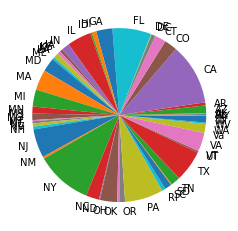

In [122]:
plt.pie(y_axis, labels=x_axis)
plt.show()

([<matplotlib.patches.Wedge at 0x7f79e07dafd0>,
 [Text(1.0999831508656635, 0.006088334061707603, 'AL'),
  Text(1.0998467081944483, 0.01836350930068955, 'AK'),
  Text(1.0975240387680236, 0.07376302818028979, 'AZ'),
  Text(1.0907603603206624, 0.14227380768482614, 'AR'),
  Text(1.138439767266565, 0.627658263951053, 'CA'),
  Text(0.6520956458510409, 0.8858731673677187, 'CO'),
  Text(0.5203268075766637, 0.969154277355818, 'CT'),
  Text(0.43266757072833917, 1.0113351438766665, 'DC'),
  Text(0.4060358767465055, 1.0223183783903607, 'DE'),
  Text(0.1618513622537631, 1.0880276359250263, 'FL'),
  Text(-0.19050675219052665, 1.0833776706992893, 'GA'),
  Text(-0.3202040515848708, 1.0523637039296982, 'HI'),
  Text(-0.3575676476651445, 1.0402621676016173, 'ID'),
  Text(-0.5087269343240308, 0.9752932411809657, 'IL'),
  Text(-0.6822382407056818, 0.8628736772661549, 'IN'),
  Text(-0.7358497794109357, 0.8176338435637787, 'IA'),
  Text(-0.7644738039618381, 0.79093602968642, 'KS'),
  Text(-0.779908195070872

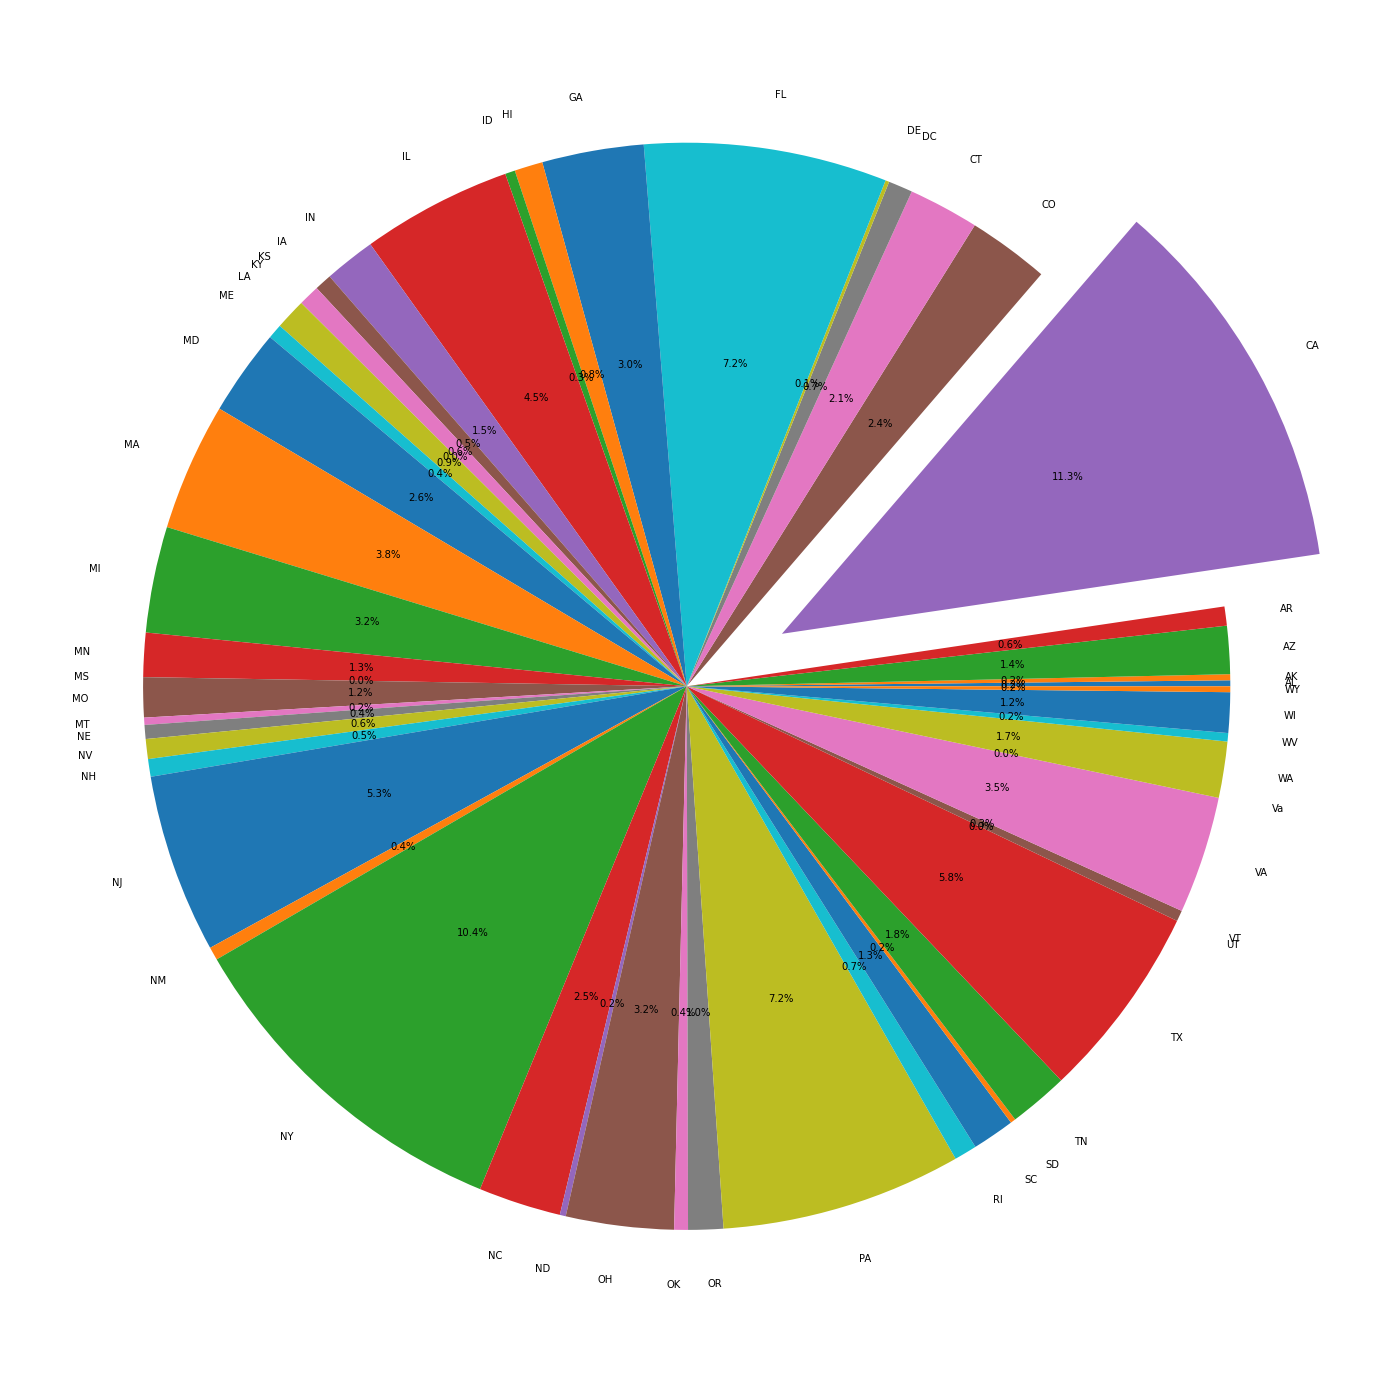

In [123]:
plt.subplots(figsize=(25, 25))
explode_values = (0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, )
plt.pie(y_axis, explode=explode_values, labels=x_axis, autopct='%.1f%%')

In [ ]:
#test2 = states_2020.sort_values("State")
#test2 = states_2020.sort_values(['State'],ascending=True).groupby('').head()

for i in range(len(states_2020)) :
    #test2=states_2020['State'].groupby,
    print(states_2020['State'].groupby(states_2020.loc[i, "State"], states_2020.loc[i, "Item/Bottle Count"]))
#test2
#This isn't working.

In [ ]:
test=states_2020.sort_values("State")
test.head()

In [ ]:
#Loop through states_2020 to gather the Item/Bottle Count for all 50 states.
for i in range(len(states_2020)) :
  print(states_2020.loc[i, "State"], states_2020.loc[i, "Item/Bottle Count"])

In [ ]:
# How many items/bottles per month have been purchased in each state from January 2020 to December 2021?
# How many items/bottls per month 01/2020 - 12/2021
# How many items/bottles per state then per month

In [ ]:
# Is there a time of year where wine shipments increased? For example, during the holidays or during COVID stay-at-home orders?

In [ ]:
# How do wine shipments compare between states that had stay at home orders issued vs states that did not?
    #Create a dataframe with data from states that issued stay at home orders
    #Create a dataframe with data from states that did not issue stay at home orders
    #Generate summary statistics for each data frame 
    #Convert each summary stat list to a data frame
    #Merge the two summary statistic data frames to create a visual side-by-side comparison

In [ ]:
#How do wine shipments compare between red states and blue states?
    #Create a dataframe with data from "Red" states
    #Create a dataframe with data from "Blue" states 
    #Generate summary statistics for each data frame 
    #Convert each summary stat list to a data frame
    #Merge the two summary statistic data frames to create a visual side-by-side comparison

In [ ]:
# Which state consumed the most wine?  

In [ ]:
# Which state saw the most significant change in wine consumption?